In [1]:
# pip install bertopic pandas scikit-learn sentence-transformers

In [2]:
import pandas as pd
from bertopic import BERTopic

# 01 - Loading Data

In [3]:
# data source: Kaggle - https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
df = pd.read_csv("../Data/bbc-news-data.csv", sep="\t")

In [4]:
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [5]:
df.shape

(2225, 4)

In [6]:
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [7]:
# Extract text column as a list
documents = df["content"].astype(str).tolist()

In [8]:
# Create BERTopic model (default settings)
topic_model = BERTopic(language="english", verbose=True)

# Fit the model
topics, probs = topic_model.fit_transform(documents)

2026-01-04 18:00:13,771 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

2026-01-04 18:02:18,253 - BERTopic - Embedding - Completed ✓
2026-01-04 18:02:18,254 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-04 18:02:40,882 - BERTopic - Dimensionality - Completed ✓
2026-01-04 18:02:40,883 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-04 18:02:40,976 - BERTopic - Cluster - Completed ✓
2026-01-04 18:02:40,981 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-04 18:02:41,773 - BERTopic - Representation - Completed ✓


In [9]:
# Show topic information
topic_info = topic_model.get_topic_info()
print(topic_info)

    Topic  Count                                 Name  \
0      -1    399                      -1_the_to_of_in   
1       0    186                       0_he_we_the_to   
2       1    166                   1_film_the_best_in   
3       2    151            2_england_wales_the_rugby   
4       3    136                3_music_the_and_album   
5       4     85               4_open_roddick_in_seed   
6       5     75                5_security_that_to_of   
7       6     73                    6_in_her_she_race   
8       7     68                 7_mr_he_blair_labour   
9       8     56                  8_games_game_of_the   
10      9     50                   9_the_to_be_police   
11     10     50                10_show_tv_the_series   
12     11     47               11_ebbers_the_of_fraud   
13     12     44           12_deutsche_boerse_lse_its   
14     13     44            13_mobile_phone_phones_to   
15     14     39            14_tax_election_mr_labour   
16     15     39               

In [10]:
# Show top words for each topic
for topic_id in topic_info["Topic"]:
    if topic_id != -1:  # -1 is outliers
        print(f"\nTopic {topic_id}:")
        print(topic_model.get_topic(topic_id))


Topic 0:
[('he', np.float64(0.019017897047510064)), ('we', np.float64(0.01778589707531896)), ('the', np.float64(0.017772523336460795)), ('to', np.float64(0.017376312341084273)), ('club', np.float64(0.01629470225204727)), ('but', np.float64(0.016238402040530467)), ('and', np.float64(0.015773871486245785)), ('his', np.float64(0.015148403160911043)), ('have', np.float64(0.014168098721876111)), ('chelsea', np.float64(0.013764742687674827))]

Topic 1:
[('film', np.float64(0.03747737022205193)), ('the', np.float64(0.022366817501175005)), ('best', np.float64(0.021827926803339864)), ('in', np.float64(0.01751909265610509)), ('and', np.float64(0.017480448455723604)), ('of', np.float64(0.016728461127233717)), ('for', np.float64(0.0164524983644659)), ('films', np.float64(0.015002472678311353)), ('actor', np.float64(0.013796016344378239)), ('was', np.float64(0.013508780833764332))]

Topic 2:
[('england', np.float64(0.022360424799454652)), ('wales', np.float64(0.018773892901634906)), ('the', np.flo

In [11]:
df["topic"] = topics
df.to_csv("data_with_topics.csv", index=False)

# Set the number of topics

In [12]:
topic_model2 = BERTopic(
    language="english",
    nr_topics=5,   
    min_topic_size=10, 
    verbose=True, 
)

# Fit the model
topics2, probs2 = topic_model2.fit_transform(documents)

2026-01-04 18:02:42,828 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

2026-01-04 18:04:49,344 - BERTopic - Embedding - Completed ✓
2026-01-04 18:04:49,346 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-04 18:04:58,540 - BERTopic - Dimensionality - Completed ✓
2026-01-04 18:04:58,542 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-04 18:04:58,622 - BERTopic - Cluster - Completed ✓
2026-01-04 18:04:58,622 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2026-01-04 18:04:59,529 - BERTopic - Representation - Completed ✓
2026-01-04 18:04:59,530 - BERTopic - Topic reduction - Reducing number of topics
2026-01-04 18:04:59,548 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-04 18:05:00,387 - BERTopic - Representation - Completed ✓
2026-01-04 18:05:00,390 - BERTopic - Topic reduction - Reduced number of topics from 43 to 5


In [13]:
# Show topic information
topic_info2 = topic_model2.get_topic_info()
print(topic_info2)

   Topic  Count              Name  \
0     -1    364  -1_the_to_of_and   
1      0    667    0_the_to_of_in   
2      1    520   1_the_to_in_and   
3      2    355   2_the_and_in_of   
4      3    319   3_the_to_of_and   

                                    Representation  \
0  [the, to, of, and, in, said, for, is, that, it]   
1  [the, to, of, in, and, said, that, is, for, on]   
2    [the, to, in, and, of, he, but, for, was, on]   
3   [the, and, in, of, to, for, film, was, on, is]   
4   [the, to, of, and, in, that, is, it, for, are]   

                                 Representative_Docs  
0  [ The ultimate prize of 10 Downing Street may ...  
1  [ The minimum wage will rise in October, benef...  
2  [ Listen to the full interview on Sport on Fiv...  
3  [ Hollywood stars brought a touch of glamour t...  
4  [ If you are a geek or gadget fan, the next 12...  


In [14]:
# Show top words for each topic
for topic_id in topic_info2["Topic"]:
    if topic_id != -1:  # -1 is outliers
        print(f"\nTopic {topic_id}:")
        print(topic_model2.get_topic(topic_id))


Topic 0:
[('the', np.float64(0.09570628991889381)), ('to', np.float64(0.0640679214423698)), ('of', np.float64(0.056804569195729605)), ('in', np.float64(0.05293263192806265)), ('and', np.float64(0.04769484958942477)), ('said', np.float64(0.03499903094785466)), ('that', np.float64(0.032227948931059645)), ('is', np.float64(0.03082346432739224)), ('for', np.float64(0.029811597419886517)), ('on', np.float64(0.029144961935231462))]

Topic 1:
[('the', np.float64(0.08621134049137238)), ('to', np.float64(0.0591517526661511)), ('in', np.float64(0.052743924525469874)), ('and', np.float64(0.052635906195543765)), ('of', np.float64(0.03940481531124154)), ('he', np.float64(0.034051480987113324)), ('but', np.float64(0.032825339052641594)), ('for', np.float64(0.03158087586950184)), ('was', np.float64(0.02941688592986443)), ('on', np.float64(0.029174659148846604))]

Topic 2:
[('the', np.float64(0.09576565593250515)), ('and', np.float64(0.0571442876827022)), ('in', np.float64(0.05290052233411817)), ('of

In [15]:
# pip install --upgrade nbformat

In [16]:
topic_model2.visualize_barchart(top_n_topics=10)

# Remove stop words in the document and then proceed

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [18]:
def stop_word_removal(text):
    wordlst = text.lower().split(" ")
    newlist = []
    for word in wordlst:
        if word not in stop_words:
            newlist.append(word)

    newstring = " ".join(newlist)
    return newstring

text = 'The apple is of a the red'
stop_word_removal(text)

'apple red'

In [19]:
df['cleaned'] = df["content"].apply(stop_word_removal)
newdocuments = df["cleaned"].astype(str).tolist()

In [20]:
newdocuments[:2]

[' quarterly profits us media giant timewarner jumped 76% $1.13bn (£600m) three months december, $639m year-earlier.  firm, one biggest investors google, benefited sales high-speed internet connections higher advert sales. timewarner said fourth quarter sales rose 2% $11.1bn $10.9bn. profits buoyed one-off gains offset profit dip warner bros, less users aol.  time warner said friday owns 8% search-engine google. internet business, aol, mixed fortunes. lost 464,000 subscribers fourth quarter profits lower preceding three quarters. however, company said aol\'s underlying profit exceptional items rose 8% back stronger internet advertising revenues. hopes increase subscribers offering online service free timewarner internet customers try sign aol\'s existing customers high-speed broadband. timewarner also restate 2000 2003 results following probe us securities exchange commission (sec), close concluding.  time warner\'s fourth quarter profits slightly better analysts\' expectations. film d

In [21]:
topic_model3 = BERTopic(
    language="english",
    nr_topics=5,   
    min_topic_size=10, 
    verbose=True, 
)

# Fit the model
topics3, probs3 = topic_model3.fit_transform(newdocuments)

2026-01-04 18:05:02,072 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

2026-01-04 18:07:02,293 - BERTopic - Embedding - Completed ✓
2026-01-04 18:07:02,294 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-04 18:07:10,825 - BERTopic - Dimensionality - Completed ✓
2026-01-04 18:07:10,826 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-04 18:07:10,905 - BERTopic - Cluster - Completed ✓
2026-01-04 18:07:10,906 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2026-01-04 18:07:11,520 - BERTopic - Representation - Completed ✓
2026-01-04 18:07:11,521 - BERTopic - Topic reduction - Reducing number of topics
2026-01-04 18:07:11,530 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-04 18:07:12,143 - BERTopic - Representation - Completed ✓
2026-01-04 18:07:12,146 - BERTopic - Topic reduction - Reduced number of topics from 44 to 5


In [22]:
# Show topic information
topic_info3 = topic_model3.get_topic_info()
print(topic_info3)

   Topic  Count                             Name  \
0     -1    365            -1_said_mr_would_also   
1      0    638       0_said_mr_would_government   
2      1    519          1_said_game_win_england   
3      2    356           2_film_best_said_music   
4      3    347  3_said_people_technology_mobile   

                                      Representation  \
0  [said, mr, would, also, government, people, us...   
1  [said, mr, would, government, us, labour, elec...   
2  [said, game, win, england, first, world, last,...   
3  [film, best, said, music, awards, also, years,...   
4  [said, people, technology, mobile, users, game...   

                                 Representative_Docs  
0  [ michael howard denied shadow cabinet split d...  
1  [ tony blair dismissed reports told gordon bro...  
2  [ wales fly-half stephen jones admitted happy ...  
3  [ aviator named best film golden globe awards,...  
4  [ mobile phones still enjoying boom time sales...  


In [23]:
# Show top words for each topic
for topic_id in topic_info3["Topic"]:
    if topic_id != -1:  # -1 is outliers
        print(f"\nTopic {topic_id}:")
        print(topic_model3.get_topic(topic_id))


Topic 0:
[('said', np.float64(0.05014303377721872)), ('mr', np.float64(0.039998977458467595)), ('would', np.float64(0.026243876818912108)), ('government', np.float64(0.020420337758698663)), ('us', np.float64(0.01799853435816769)), ('labour', np.float64(0.01761340970528231)), ('election', np.float64(0.017521729763206317)), ('year', np.float64(0.01668100544293886)), ('also', np.float64(0.016082516831689986)), ('new', np.float64(0.01559254719123724))]

Topic 1:
[('said', np.float64(0.026876570977688353)), ('game', np.float64(0.023304843795463576)), ('win', np.float64(0.021078962052828658)), ('england', np.float64(0.020414058258278547)), ('first', np.float64(0.01966893654283086)), ('world', np.float64(0.01753754666497913)), ('last', np.float64(0.017075719992999797)), ('players', np.float64(0.016861963413698212)), ('club', np.float64(0.016836595177580495)), ('two', np.float64(0.016295142120081093))]

Topic 2:
[('film', np.float64(0.046879645391051446)), ('best', np.float64(0.03939006544962

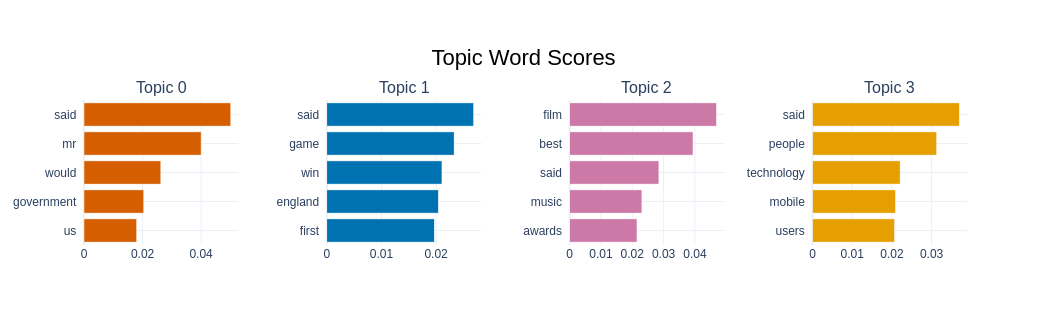

In [24]:
topic_model3.visualize_barchart(top_n_topics=10)

In [25]:
fig1 = topic_model3.visualize_documents(documents)
fig1.write_html("documents_overview.html")

In [26]:
fig = topic_model3.visualize_topics()
fig.write_html("topics_overview.html")